In [1]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [4]:
ls

 Volume in drive C has no label.
 Volume Serial Number is FA9B-F459

 Directory of C:\Users\DELL\Desktop\Mask_detection_using_yolo

28/02/2022  06:24 PM    <DIR>          .
28/02/2022  06:24 PM    <DIR>          ..
28/02/2022  05:01 PM    <DIR>          .ipynb_checkpoints
28/02/2022  05:07 PM    <DIR>          test
28/02/2022  05:07 PM    <DIR>          train
28/02/2022  06:24 PM            17,771 Untitled.ipynb
28/02/2022  05:07 PM    <DIR>          valid
28/02/2022  05:33 PM    <DIR>          yolov5
28/02/2022  05:03 PM        14,808,437 yolov5s.pt
               2 File(s)     14,826,208 bytes
               7 Dir(s)  441,520,054,272 bytes free


In [2]:
%pip install -q wandb
import wandb
wandb.login()

Note: you may need to restart the kernel to use updated packages.


wandb: Currently logged in as: sharon123 (use `wandb login --relogin` to force relogin)


True

In [4]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [19]:
!cd yolov5 && python train.py --img 416 --batch 16 --epochs 100 --data dataset.yml --weights yolov5s.pt --workers 2

wandb: Currently logged in as: sharon123 (use `wandb login --relogin` to force relogin)
train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v6.1-11-g63ddb6f torch 1.8.2+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, 

module 'signal' has no attribute 'SIGALRM'



wandb:  View project at https://wandb.ai/sharon123/train
wandb:  View run at https://wandb.ai/sharon123/train/runs/ys5q71f8
wandb: Run data is saved locally in C:\Users\DELL\Desktop\Mask_detection_using_yolo\yolov5\wandb\run-20220301_104632-ys5q71f8
wandb: Run `wandb offline` to turn off syncing.
Overriding model.yaml nc=80 with nc=2

                 from  n    params  module                                  arguments                     
  0                -1  1      3520  models.common.Conv                      [3, 32, 6, 2, 2]              
  1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  2                -1  1     18816  models.common.C3                        [64, 64, 1]                   
  3                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  4                -1  2    115712  models.common.C3                        [128, 128, 2]                 
  5                -1

In [20]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp19/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\DELL/.cache\torch\hub\master.zip
YOLOv5  2022-3-1 torch 1.8.2+cpu CPU

Fusing layers... 
Model Summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [21]:
img = os.path.join('yolov5/data/images/0_10725_jpg.rf.cde494b05911f991c3cc31c8670044b9.jpg')

In [22]:
results = model(img)

In [23]:
results.print()

image 1/1: 434x620 4 masks, 1 no-mask
Speed: 36.6ms pre-process, 410.8ms inference, 7.1ms NMS per image at shape (1, 3, 448, 640)


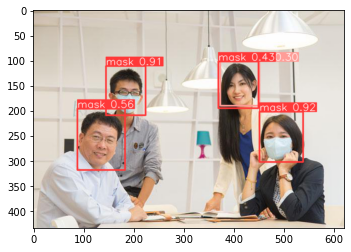

In [24]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [26]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()